# Exercises: Chapter 5

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [18]:
%matplotlib inline

Create the following visualizations using what you have learned up to this point in this book. Use the data from this chapter's `data/directory`:

#### **1. Plot the rolling 20-day minimum of the Facebook closing price using pandas.**

In [13]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb.head(3)

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896


<AxesSubplot: title={'center': '20 Day Rolling Minimum Price'}, xlabel='date'>

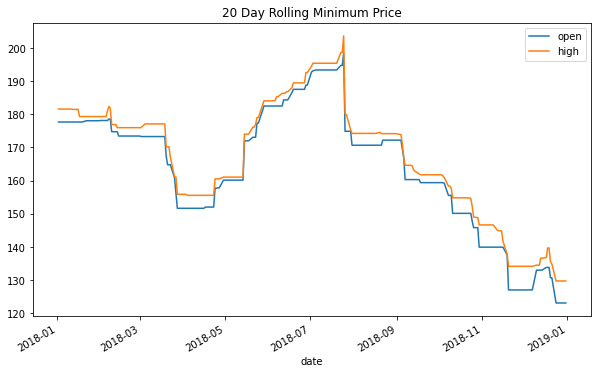

In [23]:

(fb.loc[:, ['open', 'high']]
 .rolling('20D')
 .min()
 .plot(figsize=(10,6),
      title = "20 Day Rolling Minimum Price")
)

<AxesSubplot: xlabel='date'>

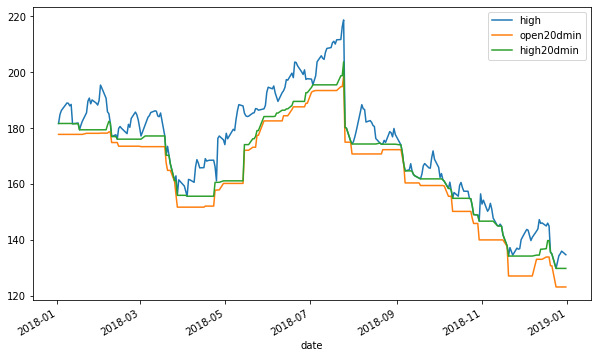

In [26]:
# me, added 'high' to the plot not rolling to see if rolling values made sense.
# they seem to
(fb.loc[:, ['open', 'high']]
 .assign(
     open20dmin = lambda x: x.open.rolling('20D').min(),
     high20dmin = lambda x: x.high.rolling('20D').min())
 .drop(columns='open')
 .plot(figsize=(10,6))
 )

#### **2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.**

Text(0.5, 0, 'Daily Change ($) from Open to Close')

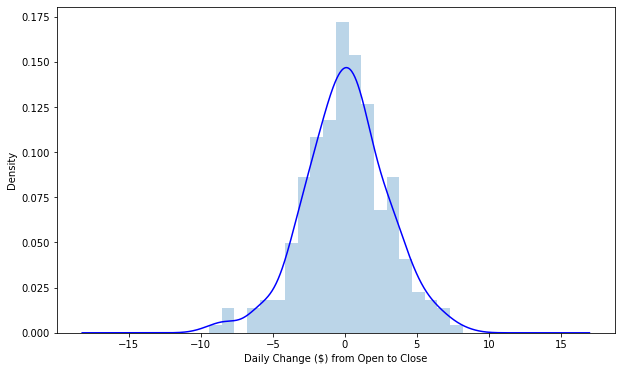

In [58]:
fb_chg=\
(fb
 .assign(chg = lambda x: x.close - x.open)
 .loc[:, ['chg']]
)

# histogram of chg
ax = fb_chg.chg.plot(figsize=(10,6), kind='hist', alpha=0.3, density=True, bins=20)

# kernel density plotted over histogram, using ax=ax to use the histogram assigned to ax in prior step
fb_chg.chg.plot(ax=ax, kind='kde',color='blue')
plt.xlabel('Daily Change ($) from Open to Close')


#### **3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.**

In [63]:
eq = pd.read_csv('data/earthquakes.csv')
eq.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


Text(0, 0.5, 'Magnitude')

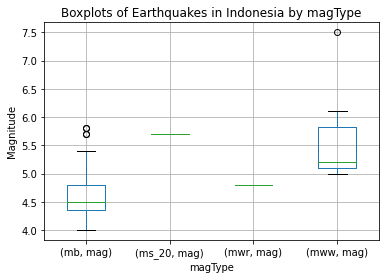

In [91]:
(eq
 .assign(time = lambda x: pd.to_datetime(x.time, unit='ms')) # convert time object to datetime
 .set_index('time')
 .sort_index()
 .query('parsed_place == "Indonesia"')
 .loc[:, ['magType', 'mag']]
 .groupby('magType')
 .boxplot(subplots=False)
)

plt.title("Boxplots of Earthquakes in Indonesia by magType")
plt.xlabel("magType")
plt.ylabel("Magnitude")

#### **4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.**

#### **5. Plot the 14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain, and the USA:**

>##### **a.  First, use the `diff()` method that was introduced in the Working with time series data section of Chapter 4, Aggregating Pandas DataFrames, to calculate the day-over-day change in new cases. Then, use `rolling()` to calculate the 14-day moving average.**



>##### **b) Make three subplots: one for China; one for Spain and Italy; and one for Brazil, India, and the USA.** 



#### **6. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock prices:**  

>##### **a) The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Working with time series data section of Chapter 4, Aggregating Pandas DataFrames, for an easy way to do this).** 

>##### **b) The second subplot will be a bar plot showing the net effect this had monthly, using `resample()`.**

>##### **c) Bonus #1: Color the bars according to whether there are gains in the stock price (green) or drops in the stock price (red).**


>##### **d) Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.**